
- Imoprt packages and libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FCI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



- Load The Data

In [3]:
Fake = pd.read_csv('Fake.csv')
Truee = pd.read_csv('True.csv')

In [4]:
Fake["label"] = "Fake"
Truee["label"] = "Real"

In [5]:
df = pd.concat([Fake,Truee])
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",Real
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",Real
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",Real
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",Real


In [6]:
df.drop(["subject","date","title"],axis=1,inplace=True)
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,Real
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",Real
21414,MINSK (Reuters) - In the shadow of disused Sov...,Real
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,Real


In [7]:
df.duplicated().sum()

6251

In [8]:
df.drop_duplicates(inplace=True)
df

,text,label
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,Real
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",Real
21414,MINSK (Reuters) - In the shadow of disused Sov...,Real
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,Real


In [9]:
df = df.sample(frac=1)
df

,text,label
862,With the release of the email chain that prove...,Fake
4293,MOSCOW (Reuters) - Russia’s Foreign Minister S...,Real
14016,Governor Mike Pence just endorsed Ted Cruz but...,Fake
22635,Tune in to the Alternate Current Radio Network...,Fake
11264,"Sen. Dick Durbin (D., Ill.) announced Tuesday ...",Fake
...,...,...
808,TOKYO (Reuters) - Every American president has...,Real
3518,WASHINGTON (Reuters) - President Donald Trump ...,Real
4184,WASHINGTON (Reuters) - When U.S. President Do...,Real
16569,MADRID (Reuters) - Spain s central government ...,Real


In [10]:
df["label"].value_counts()

label
Real    21192
Fake    17455
Name: count, dtype: int64

**Text preprocessing**

**Convert text to vectors**

**apply ML model**

**metrics**

**prediction**

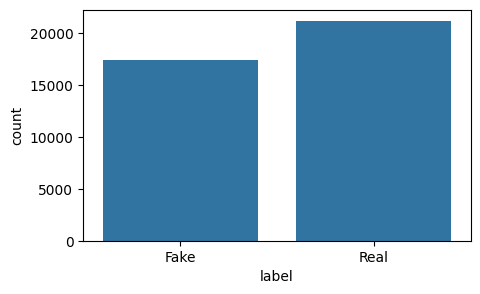

In [11]:
plt.figure(figsize=(5,3))
sns.countplot(x=df["label"])

plt.show()

In [12]:
df["label"] = df["label"].map({"Fake":0,"Real":1})
df

,text,label
862,With the release of the email chain that prove...,0
4293,MOSCOW (Reuters) - Russia’s Foreign Minister S...,1
14016,Governor Mike Pence just endorsed Ted Cruz but...,0
22635,Tune in to the Alternate Current Radio Network...,0
11264,"Sen. Dick Durbin (D., Ill.) announced Tuesday ...",0
...,...,...
808,TOKYO (Reuters) - Every American president has...,1
3518,WASHINGTON (Reuters) - President Donald Trump ...,1
4184,WASHINGTON (Reuters) - When U.S. President Do...,1
16569,MADRID (Reuters) - Spain s central government ...,1


In [13]:
# Preprocessing Function
ps = PorterStemmer()
corpus = set()
def preprocessing(text):
  # removing unwanted space
    text = text.strip()
  # removing html tags
    text = re.sub('<.*?>','',text)
  # removing special characters numerical values
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
  # semming the word
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    corpus.add(text)
    return text

In [14]:
df["Preprocessed_text"] = df["text"].apply(preprocessing)

In [15]:
df.head()

,text,label,Preprocessed_text
862,With the release of the email chain that prove...,0,with the releas of the email chain that prove ...
4293,MOSCOW (Reuters) - Russia’s Foreign Minister S...,1,moscow reuter russia s foreign minist sergei l...
14016,Governor Mike Pence just endorsed Ted Cruz but...,0,governor mike penc just endors ted cruz but it...
22635,Tune in to the Alternate Current Radio Network...,0,tune in to the altern current radio network ac...
11264,"Sen. Dick Durbin (D., Ill.) announced Tuesday ...",0,sen dick durbin d ill announc tuesday that he ...


In [16]:
df =df.drop("text",axis=1)

In [31]:
df.to_csv("preprocessed_data.csv",index=False)

In [17]:
from tkinter.constants import Y
x = df["Preprocessed_text"]
y = df["label"]

In [30]:
x[0]

0    donald trump just couldn t wish all american a...
0    washington reuter the head of a conserv republ...
Name: Preprocessed_text, dtype: object

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                 test_size=0.2,
                                                 random_state=2,
                                                 stratify=y)  #Preserve the distribution of the target variable


In [19]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30917,), (7730,), (30917,), (7730,))

In [20]:
tf_idf = TfidfVectorizer()
x_train = tf_idf.fit_transform(x_train)
x_test = tf_idf.transform(x_test)

In [21]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30917, 79243), (7730, 79243), (30917,), (7730,))

In [22]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train,y_train)

MultinomialNB()

In [23]:
y_pred = naive_bayes_classifier.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [24]:
y_pred.shape

(7730,)

In [25]:
print(classification_report(y_test,y_pred,target_names=["Fake","Real"]))

              precision    recall  f1-score   support

        Fake       0.95      0.90      0.93      3491
        Real       0.92      0.96      0.94      4239

    accuracy                           0.94      7730
   macro avg       0.94      0.93      0.93      7730
weighted avg       0.94      0.94      0.94      7730



In [26]:
print("confusion_matrix")
confusion_matrix(y_test,y_pred)


confusion_matrix


array([[3146,  345],
       [ 154, 4085]], dtype=int64)

In [37]:
news = str(input())
input_data = {"text":[news]}
new_def_test = pd.DataFrame(input_data)
new_def_test = new_def_test["text"].apply(preprocessing)
vectorized_input_data = tf_idf.transform(new_def_test)
prediction = naive_bayes_classifier.predict(vectorized_input_data)

if prediction == 0:
  print("Fake News")
else:
  print("Real News")

Fake News


In [28]:
from pickle import dump
dump(naive_bayes_classifier,open('naive_bayes_classifier.pkl','wb'))
dump(tf_idf,open('it_idf.pkl','wb'))